# 4.2.3 Clustering Methods Comparison

# DRILL: Mo' blobs, mo' problems?

You've seen how these three methods work on three blobs of reasonably separated data. Now go back and change the data. Create more or fewer blobs, and set the blobs closer together or farther apart. Set up at least three different blob configuations, then run the four methods ($k$-means, mean shift, spectral clustering and affinity propagation) on each one.  Write up a report for your mentor where you discuss what you learned about the clustering methods based on their relative performance for your different blob setups. 

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
%matplotlib inline

# Four Blobs (same distance)

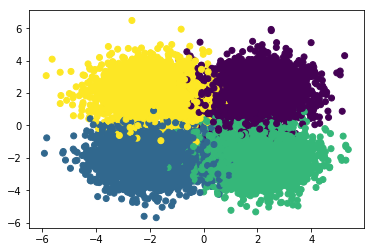

In [2]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2], [-2, 2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

## Four Blobs - K Means

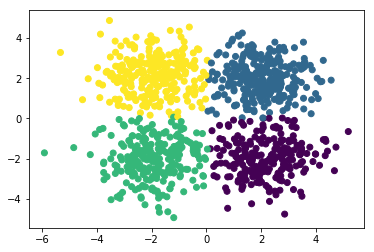

Comparing k-means clusters against the data:
col_0    0    1    2    3
row_0                    
0        5    6  226    0
1      260    0    3    2
2        0  228    9    7
3        8    5    0  241


In [3]:
from sklearn.cluster import KMeans

# Calculate predicted values.
kmeans = KMeans(n_clusters=4, random_state=42)
y_pred = kmeans.fit_predict(X_train)

# Plot the solution.
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_train))

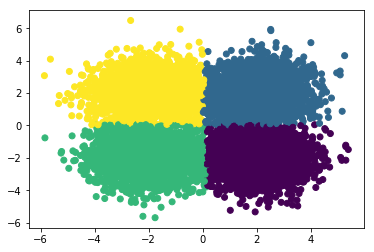

Comparing k-means clusters against the data:
col_0     0     1     2     3
row_0                        
0        55    46  2139     1
1      2116     0    49    50
2         2  2172    72    51
3        54    43     2  2148
Centers:
[[ 2.17036242 -1.96886411]
 [ 2.03629633  2.00616566]
 [-1.9117566  -2.03311251]
 [-1.95131037  2.15794269]]


In [4]:
y_pred = kmeans.predict(X_test)

# Plot the solution.
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_test))

print('Centers:')
print(kmeans.cluster_centers_)

In [5]:
# Score
score = silhouette_score(X_test, y_pred)

print('Score: ', score)

Score:  0.52020948887


We can seet that our Silhouette Score is 0.52, that is, close to 1, which is a good sign that the clustering is configurating well and it is not overfitting.

## Four Blobs - Mean-shift

In [6]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 4


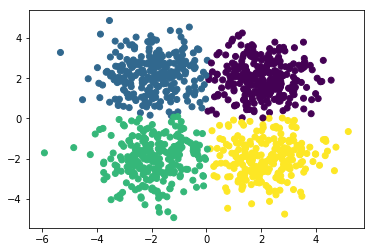

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0      260    8    0    5
1        0    5  228    6
2        3    0    9  226
3        2  240    8    0
Centers:
[[ 2.00101759  1.96957879]
 [-1.88967966  2.1194215 ]
 [-1.79761646 -1.94778711]
 [ 2.07752249 -1.93128355]]


In [7]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

print('Centers:')
print(ms.cluster_centers_)

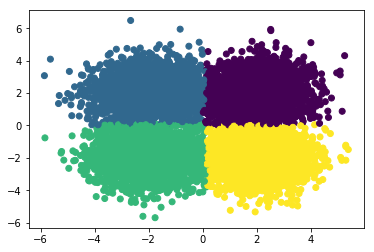

Comparing the assigned categories to the ones in the data:
col_0     0     1     2     3
row_0                        
0      2114     0    48    48
1        56    39     1  2148
2         2  2178    73    53
3        55    44  2140     1


In [8]:
y_pred = ms.predict(X_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_pred,y_test))

In [9]:
# Score
score = silhouette_score(X_test, y_pred)

print('Score: ', score)

Score:  0.520092307328


With mean shift our code decided that the optimal K value is 4, and the Silhouette Score was of 0.52, a very good one and the same as the latter algorithm, K-means.

## Four Blobs - Spectral clustering

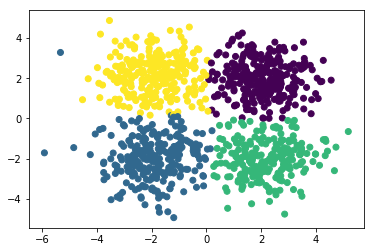

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0      262    0    3    8
1        0  228    6    5
2        3   11  223    1
3        2   10    0  238


In [10]:
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=4

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

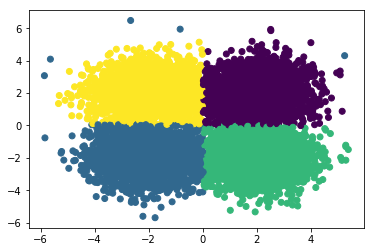

Comparing the assigned categories to the ones in the data:
col_0     0     1     2     3
row_0                        
0      2124     3    49    51
1         1  2161    57    42
2        53    57  2150     2
3        53    54     2  2141


In [11]:
#Predicted clusters.
y_pred = sc.fit_predict(X_test)

#Graph results.
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_test,y_pred))

In [12]:
# Score
score = silhouette_score(X_test, y_pred)

print('Score: ', score)

Score:  0.519606745196


Spectral Clustering had also a good Silhouette Score, and it is interesting to point out the green datapoints above the blue and violet clusters, which should be corrected.

## Four Blobs - Affinity propagation

In [13]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 25


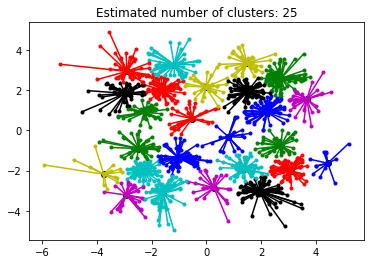

In [14]:
from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

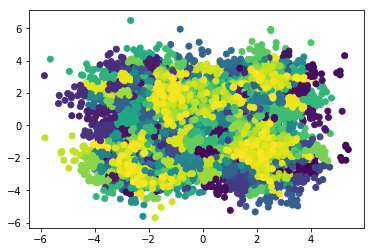

Comparing the assigned categories to the ones in the data:
col_0  0     1     2     3     4     5     6     7     8     9     ...   3745  \
row_0                                                              ...          
0         0     0     0     0     0     0     0     1     1     0  ...      0   
1         0     0     0     0     1     0     0     0     0     0  ...      0   
2         1     1     0     1     0     1     0     0     0     0  ...      0   
3         0     0     1     0     0     0     1     0     0     1  ...      3   

col_0  3746  3747  3748  3749  3750  3751  3752  3753  3754  
row_0                                                        
0         0     1     0     0     0     0    25     0     0  
1         1     0    16     0     1     0     0     0     0  
2         0     0     0     1     0     1     0     1     1  
3         0     0     0     0     0     0     0     0     0  

[4 rows x 3755 columns]


In [15]:
#Predicted clusters.
y_pred = af.fit_predict(X_test)

#Graph results.
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_test,y_pred))

In [16]:
# Score
score = silhouette_score(X_test, y_pred)

print('Score: ', score)

Score:  0.0930824514637


Four four blobs, kmeans, mean shift and spectral clustering generated a great Silhouette score, however spectral clustering produced some outliers. Affinity propagation clustering performed well, but it generated an overdimensioned number of K clusters.

# Four Blobs (closer distance)

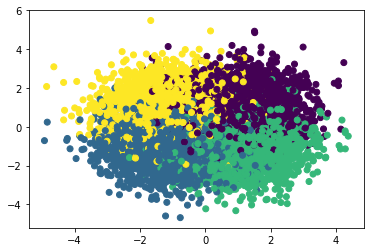

In [17]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

# The coordinates of the centers of our blobs.
centers = [[1, 1], [-1, -1], [1, -1], [-1, 1]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

## Four Close Blobs - K Means

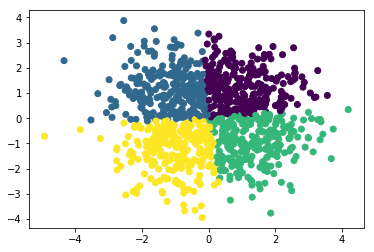

Comparing k-means clusters against the data:
col_0    0    1    2    3
row_0                    
0      191    5   20   39
1       32   35    7  179
2       43   31  176    6
3        7  168   35   26


In [18]:
# Calculate predicted values.
y_pred = KMeans(n_clusters=4, random_state=42).fit_predict(X_train)

# Plot the solution.
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_train))

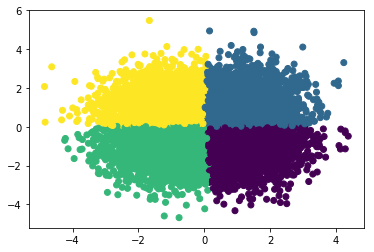

Comparing k-means clusters against the data:
col_0     0     1     2     3
row_0                        
0       279   257  1598    52
1      1587    55   281   321
2        76  1671   322   302
3       285   278    61  1575
Centers:
[[ 2.17036242 -1.96886411]
 [ 2.03629633  2.00616566]
 [-1.9117566  -2.03311251]
 [-1.95131037  2.15794269]]


In [19]:
y_pred = kmeans.predict(X_test)

# Plot the solution.
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_test))

print('Centers:')
print(kmeans.cluster_centers_)

In [20]:
# Score
score = silhouette_score(X_test, y_pred)

print('Score: ', score)

Score:  0.344198981086


The Silhouette Score is not bad however we can see a great difference if we comapre it with the latter configuration of blobs where all were at the same distance apart.

## Four Close Blobs - Mean-shift

In [21]:
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.1, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 4


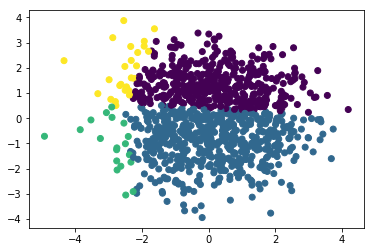

Comparing the assigned categories to the ones in the data:
col_0    0    1   2   3
row_0                  
0      209   62   0   2
1       15  208  15   1
2       23  214   1   0
3      163   62   3  22


In [22]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

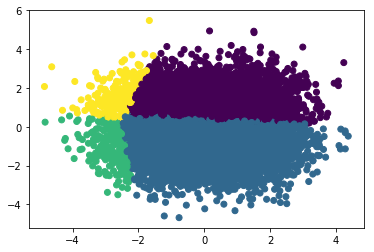

Comparing the assigned categories to the ones in the data:
col_0     0     1     2     3
row_0                        
0      1654   139   203  1387
1       573  1906  2057   602
2         0   195     1    41
3         0    21     1   220


In [23]:
y_pred = ms.predict(X_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_pred,y_test))

In [24]:
# Score
score = silhouette_score(X_test, y_pred)

print('Score: ', score)

Score:  0.207203766971


From the plot and the Silhouette score, we can determine that with mean shift the prediction is starting to overfit. On the good side, it's estimation of number of clusters was reasonable.

## Four Close Blobs - Spectral clustering

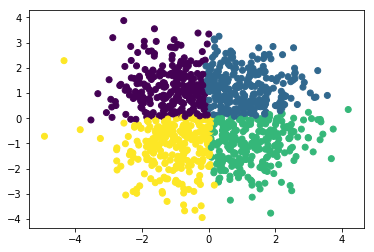

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0       33  194   39    7
1       31    4   31  173
2        6   21  181   30
3      176   38    6   30


In [25]:
# We know we're looking for three clusters.
n_clusters=4

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

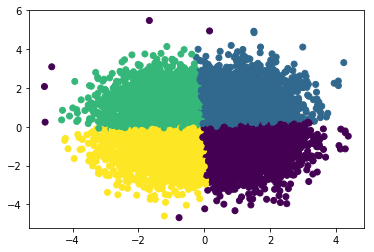

Comparing the assigned categories to the ones in the data:
col_0     0     1     2     3
row_0                        
0       335  1602   241    49
1       324    56   338  1543
2      1668   260    64   270
3        74   373  1574   229


In [26]:
#Predicted clusters.
y_pred = sc.fit_predict(X_test)

#Graph results.
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_test,y_pred))

In [27]:
# Score
score = silhouette_score(X_test, y_pred)

print('Score: ', score)

Score:  0.345110885811


## Four Close Blobs - Affinity propagation

In [28]:
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 34


Affinity propagation is known to overestimate the number of clusters – in this case, we have an absolutely absurd number.  Let's see what that looks like:

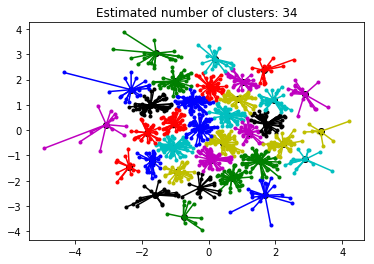

In [29]:
plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

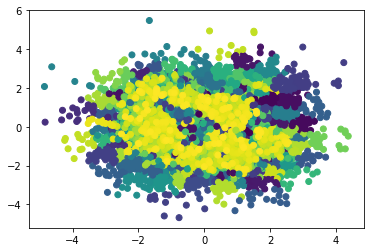

Comparing the assigned categories to the ones in the data:
col_0  0     1     2     3     4     5     6     7     8     9     ...   5226  \
row_0                                                              ...          
0         0     0     0     0     0     0     0     0     1     0  ...      0   
1         0     0     1     0     0     0     1     0     0     0  ...      0   
2         1     1     0     0     1     1     0     0     0     0  ...      1   
3         0     0     0     2     0     0     0     1     0     1  ...      0   

col_0  5227  5228  5229  5230  5231  5232  5233  5234  5235  
row_0                                                        
0         0     0     0     9     0     0     0     0     0  
1         0     0     0     0     0     0     0     2     0  
2         1     0     1     1     1     0     1     2     0  
3         0     1     0     0     0     1     0     1     1  

[4 rows x 5236 columns]


In [30]:
#Predicted clusters.
y_pred = af.fit_predict(X_test)

#Graph results.
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_test,y_pred))

In [31]:
# Score
score = silhouette_score(X_test, y_pred)

print('Score: ', score)

Score:  0.0718060986831


K means had a good score, spectral clustering, had also good/normal score, though it clearly showed signs of overfitting along with some outliers. Mean shift didn't perform very good as affinity propagation either, with an absurd number of clusters generated.

# Four Blobs (farther distance)

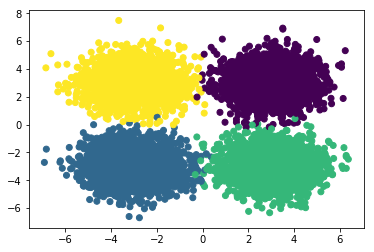

In [32]:
# The coordinates of the centers of our blobs.
centers = [[3, 3], [-3, -3], [3, -3], [-3, 3]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

## Three Far Blobs - K Means

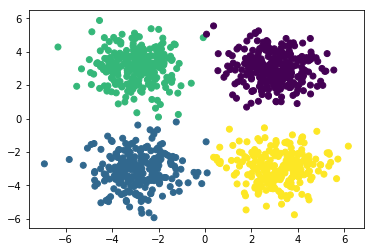

Comparing k-means clusters against the data:
col_0    0    1    2    3
row_0                    
0      273    0    0    0
1        0  238    2    0
2        0    0    0  250
3        0    1  236    0


In [33]:
# Calculate predicted values.
kmeans = KMeans(n_clusters=4, random_state=42)
y_pred = kmeans.fit_predict(X_train)

# Plot the solution.
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_train))

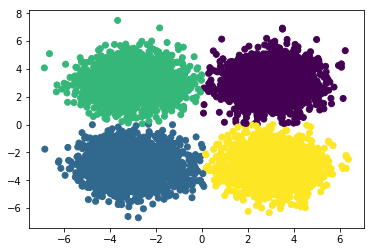

Comparing k-means clusters against the data:
col_0     0     1     2     3
row_0                        
0      2221     0     2     2
1         0  2258     8     2
2         3     2     0  2246
3         3     1  2252     0
Centers:
[[ 2.97545352  3.00248362]
 [-2.88307766 -3.05363895]
 [-2.98486852  3.10522118]
 [ 3.12130772 -2.95383493]]


In [34]:
y_pred = kmeans.predict(X_test)

# Plot the solution.
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_test))

print('Centers:')
print(kmeans.cluster_centers_)

In [35]:
# Score
score = silhouette_score(X_test, y_pred)

print('Score: ', score)

Score:  0.673076272453


K means did a great job, and it's Silhouette score is close to 1 indicating a great perfomrance.

## Four Far Blobs - Mean-shift

In [36]:
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.3, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 2


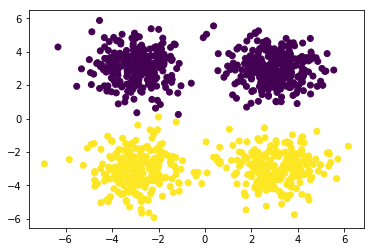

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0      273    0
1        0  239
2        0  238
3      249    1


In [37]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

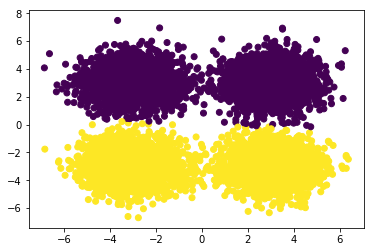

Comparing the assigned categories to the ones in the data:
col_0     0     1     2     3
row_0                        
0      2225     1     6  2246
1         2  2260  2256     4


In [38]:
y_pred = ms.predict(X_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_pred,y_test))

In [39]:
# Score
score = silhouette_score(X_test, y_pred)

print('Score: ', score)

Score:  0.457876029855


Mean shift has a better performance than in the last run, with a Silhouette score of 0.45. It is suprising that it generated two clusters.

## Four Far Blobs - Spectral clustering

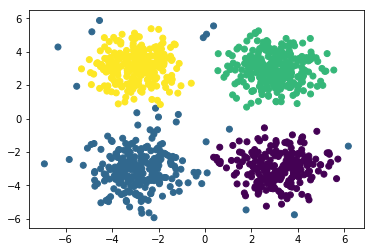

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0        0    2  271    0
1        1  238    0    0
2      232    6    0    0
3        0    9    0  241


In [40]:
# We know we're looking for three clusters.
n_clusters=4

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

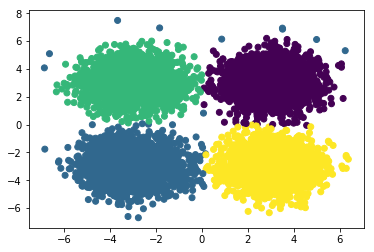

Comparing the assigned categories to the ones in the data:
col_0     0     1     2     3
row_0                        
0      2217     5     3     2
1         0  2259     2     0
2         3     8     0  2251
3         1     8  2241     0


In [41]:
#Predicted clusters.
y_pred = sc.fit_predict(X_test)

#Graph results.
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_test,y_pred))

In [42]:
# Score
score = silhouette_score(X_test, y_pred)

print('Score: ', score)

Score:  0.670846086862


Spectral clustering performed great, however as in the other tests, we can observe outliers and some overfitting.

## Four Far Blobs - Affinity propagation

In [43]:
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 18


Affinity propagation is known to overestimate the number of clusters – in this case, we have an absolutely absurd number.  Let's see what that looks like:

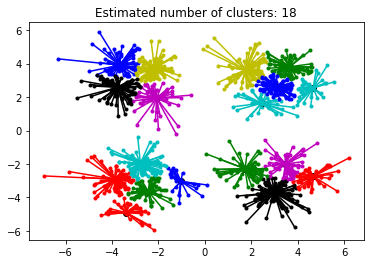

In [44]:
plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

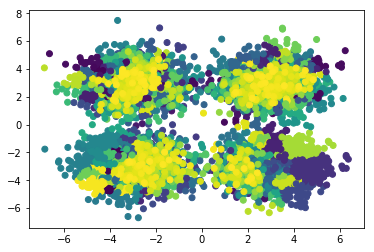

Comparing the assigned categories to the ones in the data:
col_0  0     1     2     3     4     5     6     7     8     9     ...   5186  \
row_0                                                              ...          
0         0     1     0     0     0     0     1     0     0     1  ...      2   
1         0     0     1     0     0     1     0     0     0     0  ...      0   
2         0     0     0     0     0     0     0     0     0     0  ...      0   
3         4     0     0     1     1     0     0     1     1     0  ...      0   

col_0  5187  5188  5189  5190  5191  5192  5193  5194  5195  
row_0                                                        
0         1     0     0     0     1     1     0     0     0  
1         0     1     0     0     0     0     0     0     0  
2         0     0     1     0     0     0     0     1     0  
3         0     0     0     1     0     0     5     0     1  

[4 rows x 5196 columns]


In [45]:
#Predicted clusters.
y_pred = af.fit_predict(X_test)

#Graph results.
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_test,y_pred))

In [46]:
# Score
score = silhouette_score(X_test, y_pred)

print('Score: ', score)

Score:  0.0594092312922


K means and Spectral clustering performed great, with the latter one calculating outliers. Mean shift performed much better than in the previous test, and affininy propagation generated a lower number of clusters than before but still too many.

# Conclusion

K means performed overall very well, with a decrease in it's performance when the blobs were closer together.

Spectral clustering performed well in most cases, although it shows a clear dump in it's performance when the blobs were closer. We could also observe outliers in eavery case mislabeling the predicted data points.

Mean shift performed well, although it decreased significanttly it's performance when the blobs were closer. 

Affinity propogation did not perform correctly however when the blobs were further apart from each other it could predict in clear groups but with too many clusters.

As a conclusion, we could mention that in all clustering algorithms, their performance works better when the blobs are further apart from each other.